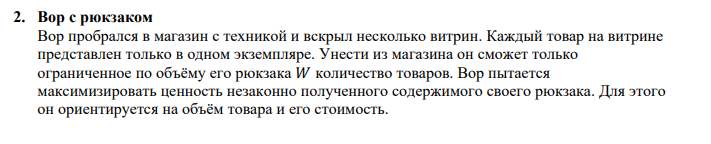
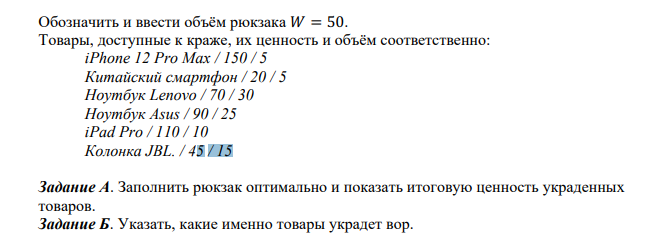

In [1]:
import numpy as np

In [23]:
# Le volume du sac est W
W = 50

# Les noms des objets que le voleur veut prendre
name_objects = ["iPhone 12 Pro Max", "Китайский смартфон", "Ноутбук Lenovo", "Ноутбук Asus", "iPad Pro", " Колонка JBL"]

# Le volume de chaque objet
v = [5,5,30,25,10,15]

# Le prix de chaque objet
p = [150,20,70,90,110,45]

# Le nombre d'objets
N = len(p)

In [24]:
# ALGORITHM de resolution
# Pour resoudre nous faisons un tableau ou nous ajoutons un a un les objets
# Ensuite nous comparons les combinaisons pour voir le prix maximal
combo = np.zeros((N+1,W+1))
for k in range(1,N+1):
    n = k-1 #  Index de l'objet dans la liste
    for s in range(1, W+1):
        if s >= v[n]: # SI IL Y A LA PLACE NOUS METTONS L'OBJET NUMERO K
            combo[k,s] = max(combo[k-1,s], combo[k-1,s-v[n]]+p[n])
        else:
            combo[k,s] = combo[k-1,s] # SI IL N'Y A PAS DE PLACE ON CONTINUE

In [25]:
# lA REPONSE EST combo(N,W)
print("Максимальная ценность украденных товаров: ",combo[N,W])

Максимальная ценность украденных товаров:  370.0


In [26]:
# ALGORITHM POUR RETROUVER LES OBJETS VOLES
index_voles = []

def search(k,s):
    if combo[k,s]==0:
        return
    if combo[k-1,s] == combo[k,s]:
        search(k-1,s)
    else:
        search(k-1,s-v[k-1])
        index_voles.append(k-1)

In [27]:
search(6,50)

In [28]:
print("Список украденных товаров:")
for i, index in enumerate(index_voles):
    print(i+1,".) ",name_objects[index])

Список украденных товаров:
1 .)  iPhone 12 Pro Max
2 .)  Китайский смартфон
3 .)  Ноутбук Asus
4 .)  iPad Pro


In [29]:
# LE VOLUME TOTAL DES OBJETS VOLES
volume = 0
for index in index_voles:
    volume += v[index]
print("Объем украденных товаров: ",volume)

Объем украденных товаров:  45
